# Data Wrangling with Pandas
Data wrangling is the process or the method of transforming, mapping, cleaning, structuring and enriching the __raw data__ into a desired format with the intent of making it more appropriate and valuable for better decision making and different purposes such as analytics.

Now that we have been exposed to the basic functionality of Pandas, lets explore some more advanced features that will be useful when addressing more complex data management tasks. 

Pandas and  Python's standard library are beneficial, providing high-level, flexible, and efficient tools for manipulating your data as needed.




In [ ]:
import pandas as pd
import numpy as np

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)

## Date/Time data handling

Since Months have unequal unmber of days and also years have different number of days (leap years), each date have differnt days and time zones that vary over space that's why it's hard to keep track of date/time. Yet information about time is essential in many analyses, particularly in the case of time series analysis.

Luckily the built-in library `datetime` handles temporal information down to the nanosecond.

In [ ]:
from datetime import datetime

In [ ]:
now = datetime.now()
now

datetime.datetime(2021, 1, 10, 8, 4, 35, 378632)

In [ ]:
now.day

10

In [ ]:
now.weekday()

6

In addition to `datetime` there are simpler objects for date and time information only, respectively.

In [ ]:
from datetime import date, time

In [ ]:
time(3, 24)

datetime.time(3, 24)

In [ ]:
date(1970, 9, 3)

datetime.date(1970, 9, 3)

Having a custom data type for dates and times is convenient because we can perform operations on them easily. For example, we may want to calculate the difference between two times so custom time can help us to select the desired date

In [ ]:
my_age = now - datetime(2000, 10, 25)
my_age

datetime.timedelta(7382, 29075, 378632)

In [ ]:
my_age.days/365.

20.224657534246575

In this section, we will manipulate data collected from ocean-going vessels on the eastern seaboard. Vessel operations are monitored using the Automatic Identification System (AIS), a safety at sea navigation technology which vessels are required to maintain and that uses transponders to transmit very high frequency (VHF) radio signals containing static information including ship name, call sign, and country of origin, as well as dynamic information unique to a particular voyage such as vessel location, heading, and speed. 

The International Maritime Organization’s (IMO) International Convention for the Safety of Life at Sea requires functioning AIS capabilities on all vessels 300 gross tons or greater and the US Coast Guard requires AIS on nearly all vessels sailing in U.S. waters. The Coast Guard has established a national network of AIS receivers that provides coverage of nearly all U.S. waters. AIS signals are transmitted several times each minute and the network is capable of handling thousands of reports per minute and updates as often as every two seconds. Therefore, a typical voyage in our study might include the transmission of hundreds or thousands of AIS encoded signals. This provides a rich source of spatial data that includes both spatial and temporal information.

For our purposes, we will use summarized data that describes the transit of a given vessel through a particular administrative area. The data includes the start and end time of the transit segment, as well as information about the speed of the vessel, how far it travelled, etc.

In [ ]:
segments = pd.read_csv("data/AIS/transit_segments.csv")
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  

For example, we might be interested in the distribution of transit lengths, so we can plot them as a histogram

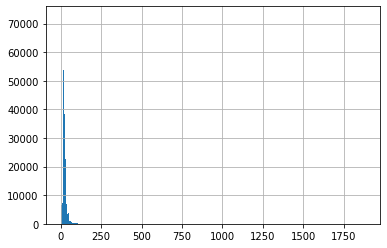

In [ ]:
segments.seg_length.hist(bins=500)

__Note:__ We see that most of the transits appear to be short, there are a few longer distances that make the plot difficult to read. This is where a transformation is useful for better visualization

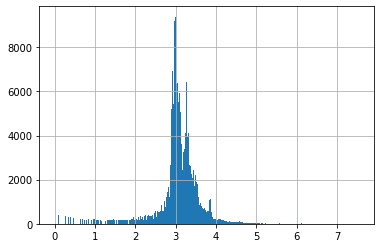

In [ ]:
segments.seg_length.apply(np.log).hist(bins=500)

We can see that although there are date/time fields in the dataset, they are not in any specialized format, such as `datetime`.

In [ ]:
segments.st_time.dtype

dtype('O')

Our first order of business will be to convert these data to `datetime`. The `strptime` method parses a string representation of a date and/or time field, according to the expected format of this information.

In [ ]:
datetime.strptime(segments.st_time.loc[0], '%m/%d/%y %H:%M')

datetime.datetime(2009, 2, 10, 16, 3)

The `dateutil` package includes a parser that attempts to detect the format of the date strings, and convert them automatically.

In [ ]:
from dateutil.parser import parse

In [ ]:
parse(segments.st_time.loc[0])

datetime.datetime(2009, 2, 10, 16, 3)

We can convert all the dates in a particular column by using the `apply` method.

In [ ]:
segments.st_time.apply(lambda d: datetime.strptime(d, '%m/%d/%y %H:%M'))

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
                 ...        
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

As a convenience, Pandas has a `to_datetime` method that will parse and convert an entire Series of formatted strings into `datetime` objects.

In [ ]:
pd.to_datetime(segments.st_time)

0        2009-02-10 16:03:00
1        2009-04-06 14:31:00
2        2009-04-06 14:36:00
3        2009-04-10 17:58:00
4        2009-04-10 17:59:00
                 ...        
262521   2010-06-15 12:49:00
262522   2010-06-15 21:32:00
262523   2010-06-17 19:16:00
262524   2010-06-18 02:52:00
262525   2010-06-18 10:19:00
Name: st_time, Length: 262526, dtype: datetime64[ns]

Pandas also has a custom NA value for missing datetime objects, `NaT`.

In [ ]:
pd.to_datetime([None])

DatetimeIndex(['NaT'], dtype='datetime64[ns]', freq=None)

Also, if `to_datetime()` has problems parsing any particular date/time format, you can pass the spec in using the `format=` argument.

## Merging and joining DataFrame objects

Now that we have the vessel transit information as we need it, we may want a little more information regarding the vessels themselves. In the `data/AIS` folder there is a second table that contains information about each of the ships that traveled the segments in the `segments` table.

In [ ]:
vessels = pd.read_csv("data/AIS/vessel_information.csv", index_col='mmsi')
vessels.head()

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9             3                         000000009/Raven/Shearwater   N   
21            1                                      Us Gov Vessel   Y   
74            2                                  Mcfaul/Sarah Bell   N   
103           3           Ron G/Us Navy Warship 103/Us Warship 103   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   
9     Unknown   Unknown         2                              50.0/62.0   
21    Unknown   Unknown         1                                  208.0   
74    Unknown   Unknown         1                                  155.0   
103   Unknown   Unknown  

In [ ]:
[v for v in vessels.type.unique() if v.find('/')==-1]

['Unknown',
 'Other',
 'Tug',
 'Towing',
 'Pleasure',
 'Cargo',
 'WIG',
 'Fishing',
 'BigTow',
 'MilOps',
 'Tanker',
 'Passenger',
 'SAR',
 'Sailing',
 'Reserved',
 'Law',
 'Dredging',
 'AntiPol',
 'Pilot',
 'HSC',
 'Diving',
 'Resol-18',
 'Tender',
 'Spare',
 'Medical']

In [ ]:
vessels.type.value_counts()

Cargo                                  5622
Tanker                                 2440
Pleasure                                601
Tug                                     221
Sailing                                 205
                                       ... 
BigTow/Pleasure/Reserved/Towing/Tug       1
Law/MilOps/Reserved/SAR/Tanker            1
Cargo/Reserved/Unknown                    1
AntiPol/Other                             1
MilOps/Other/Towing                       1
Name: type, Length: 206, dtype: int64

Since Miltiple ships had travelled multiple segments thats why there is no __one-to-one__ mapping or relatuonship between the rows of the table. The table of vessel information has a __one-to-many__ relationship with the segments

In Pandas, we can combine tables according to the value of one or more _keys_ that are used to identify rows, much like an index.

In [ ]:
df1 = pd.DataFrame(dict(id=range(4), age=np.random.randint(18, 31, size=4)))
df2 = pd.DataFrame(dict(id=range(6), score=np.random.random(size=6)))

df1, df2

(   id  age
 0   0   28
 1   1   25
 2   2   27
 3   3   18,    id     score
 0   0  0.649913
 1   1  0.545407
 2   2  0.026067
 3   3  0.852205
 4   4  0.421670
 5   5  0.632285)

In [ ]:
pd.merge(df1, df2)

   id  age     score
0   0   28  0.649913
1   1   25  0.545407
2   2   27  0.026067
3   3   18  0.852205

__Note:__ Without any information about which column to use as a key, Pandas did the right thing and used the `id` column in both tables. Unless specified otherwise, `merge` will used any common column names as keys for merging the tables. 

We also see that `id=3` from `df1` was omitted from the merged table. This is because, by default, `merge` performs an __inner join__ on the tables, meaning that the merged table represents an intersection of the two tables.

In [ ]:
pd.merge(df1, df2, how='outer')

   id   age     score
0   0  28.0  0.649913
1   1  25.0  0.545407
2   2  27.0  0.026067
3   3  18.0  0.852205
4   4   NaN  0.421670
5   5   NaN  0.632285

The __outer join__ above results in the union of the two tables, so all rows are represented, with missing values inserted as appropriate.

One can also perform __right__ and __left__ joins to include all rows of the right or left table (i.e. first or second argument to `merge`), but not necessarily the other.

Looking at the two datasets that we wish to merge

In [ ]:
segments.head(1)

   mmsi         name  transit  segment  seg_length  avg_sog  min_sog  max_sog  \
0     1  Us Govt Ves        1        1         5.1     13.2      9.2     14.5   

   pdgt10        st_time       end_time  
0    96.5  2/10/09 16:03  2/10/09 16:27  

In [ ]:
vessels.head(1)

      num_names                                              names sov  \
mmsi                                                                     
1             8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   

         flag flag_type  num_loas                                    loa  \
mmsi                                                                       
1     Unknown   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0   

      max_loa  num_types                             type  
mmsi                                                       
1       156.0          4  Dredging/MilOps/Reserved/Towing  

we see that there is a `mmsi` value (a vessel identifier) in each table, but it is used as an index for the `vessels` table. In this case, we have to specify to join on the index for this table, and on the `mmsi` column for the other.

In [ ]:
segments_merged = pd.merge(vessels, segments, left_index=True, right_on= "mmsi")

In [ ]:
segments_merged.head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                             type  ...               name transit  \

In this case, the default inner join is suitable we are not interested in observations from either table that do not have corresponding entries in the other. 

__Note:__ `mmsi` field that was an index on the `vessels` table is no longer an index on the merged table.

Here, we used the `merge` function to perform the merge.

we could also have used the `merge` method for either of the tables.

In [ ]:
vessels.merge(segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                             type  ...               name transit  \

Occasionally, there will be fields with the same information in both of the tables that we do not wish to use to join the tables; they may contain different information, despite having the same name. In this case, Pandas will by default append suffixes `_x` and `_y` to the columns to uniquely identify them.

In [ ]:
segments['type'] = 'foo'
pd.merge(vessels, segments, left_index=True, right_on='mmsi').head()

   num_names                                              names sov     flag  \
0          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
1          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
2          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
3          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   
4          8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y  Unknown   

  flag_type  num_loas                                    loa  max_loa  \
0   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
1   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
2   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
3   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   
4   Unknown         7  42.0/48.0/57.0/90.0/138.0/154.0/156.0    156.0   

   num_types                           type_x  ...  transit segment  \
0        

This behavior can be overridden by specifying a `suffixes` argument, containing a list of the suffixes to be used for the columns of the left and right columns respectively.

## Concatenation

A common data manipulation is appending rows or columns to a dataset that already satisfies the dimensions of the exsiting rows or colums, respectively. In NumPy, this is done either with `concatenate` or the convenience functions `c_` and `r_`:

In [ ]:
np.concatenate([np.random.random(5), np.random.random(5)])

array([0.35047678, 0.06264221, 0.60349625, 0.21569306, 0.20435436,
       0.60624627, 0.81395726, 0.94528991, 0.81374139, 0.46245313])

In [ ]:
np.r_[np.random.random(5), np.random.random(5)]

array([0.29982598, 0.65218115, 0.17412854, 0.17156875, 0.51745741,
       0.18595778, 0.98307083, 0.25427565, 0.18481125, 0.27215979])

In [ ]:
np.c_[np.random.random(5), np.random.random(5)]

array([[0.34907073, 0.58570669],
       [0.77727313, 0.61225711],
       [0.39091669, 0.09669923],
       [0.68039893, 0.04959026],
       [0.75962849, 0.26924364]])

This operation is also called ___binding___ or ___stacking___.

With Pandas' indexed data structures, there are additional considerations as the overlap in index values between two data structures affects how they are concatenate.

Lets import two microbiome datasets, each consisting of counts of microorganiams from a particular patient. We will use the first column of each dataset as the index.

In [ ]:
mb1 = pd.read_excel('data/microbiome/MID1.xls', 'Sheet 1', index_col=0, header=None)
mb2 = pd.read_excel('data/microbiome/MID2.xls', 'Sheet 1', index_col=0, header=None)
mb1.shape, mb2.shape

((272, 1), (288, 1))

In [ ]:
mb1.head()

                                                    1
0                                                    
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...  3
Archaea "Crenarchaeota" Thermoprotei Thermoprot...  3
Archaea "Euryarchaeota" "Methanomicrobia" Metha...  7

Let's give the index and columns meaningful custom labels

In [ ]:
mb1.columns = mb2.columns = ['Count']

In [ ]:
mb1.index.name = mb2.index.name = 'Taxon'

In [ ]:
mb1.head()

                                                    Count
Taxon                                                    
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

The index of these data is the unique biological classification of each organism, beginning with *domain*, *phylum*, *class*, and for some organisms, going all the way down to the genus level.

![classification](http://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Biological_classification_L_Pengo_vflip.svg/150px-Biological_classification_L_Pengo_vflip.svg.png)

In [ ]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

In [ ]:
mb1.index.is_unique

True

While concatenating if we concatenate without changing the axis then it will take the default `axis = 0`, we will obtain another data frame with the the rows concatenated

In [ ]:
pd.concat([mb1, mb2], axis=0).shape

(560, 1)

However, the index is no longer unique, due to overlap between the two DataFrames.

In [ ]:
pd.concat([mb1, mb2], axis=0).index.is_unique

False

Concatenating along `axis=1` will concatenate column-wise, but respecting the indices of the two DataFrames.

In [ ]:
pd.concat([mb1, mb2], axis=1).shape

(438, 2)

In [ ]:
pd.concat([mb1, mb2], axis=1).head()

                                                    Count  Count
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    7.0   23.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    2.0    2.0
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...    3.0   10.0
Archaea "Crenarchaeota" Thermoprotei Thermoprot...    3.0    9.0
Archaea "Euryarchaeota" "Methanomicrobia" Metha...    7.0    9.0

In [ ]:
pd.concat([mb1, mb2], axis=1).values[:5]

array([[ 7., 23.],
       [ 2.,  2.],
       [ 3., 10.],
       [ 3.,  9.],
       [ 7.,  9.]])

If we are only interested in common data that are included in both DataFrames, we can specify a `join=inner` argument.

In [ ]:
pd.concat([mb1, mb2], axis=1, join='inner').head()

                                                    Count  Count
Taxon                                                           
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7     23
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2      2
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3     10
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3      9
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7      9

If we wanted to use the second table to fill values msissing from the first table, we could use `combine_first` attribute to do so

In [ ]:
mb1.combine_first(mb2).head()

                                                    Count
Taxon                                                    
Archaea "Crenarchaeota" Thermoprotei Acidilobal...    2.0
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   14.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    7.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    1.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...    2.0

We can also create a hierarchical index based on keys identifying the original tables.

In [ ]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).head()

                                                             Count
         Taxon                                                    
patient1 Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7
         Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2
         Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3
         Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3
         Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7

In [ ]:
pd.concat([mb1, mb2], keys=['patient1', 'patient2']).index.is_unique

True

Alternatively, we can pass keys to the concatenation by converting the dataframe (or Series) as a dictionary

In [ ]:
pd.concat(dict(patient1=mb1, patient2=mb2), axis=1).head()

                                                   patient1 patient2
                                                      Count    Count
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7.0     23.0
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2.0      2.0
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3.0     10.0
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3.0      9.0
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7.0      9.0

If you want `concat` to work like `numpy.concatanate`, you may provide the `ignore_index=True` argument.

## Exercise

In the *data/microbiome* subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10th file that describes the content of each. Write code that imports each of the data spreadsheets and combines them into a single `DataFrame`, adding the identifying information from the metadata spreadsheet as columns in the combined `DataFrame`.

In [ ]:
metadata = pd.read_excel('data/microbiome/metadata.xls', sheet_name='Sheet1')

chunks = []
for i in range(9):
    this_file = pd.read_excel('data/microbiome/MID{0}.xls'.format(i+1), 'Sheet 1', index_col=0, header=None, names=['Taxon', 'Count'])
    this_file.columns = ['Count']
    this_file.index.name = 'Taxon'
    for m in metadata.columns:
        this_file[m] = metadata.loc[i][m]
    chunks.append(this_file)

pd.concat(chunks)

                                                    Count BARCODE  \
Taxon                                                               
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      7    MID1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...      2    MID1   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...      3    MID1   
Archaea "Crenarchaeota" Thermoprotei Thermoprot...      3    MID1   
Archaea "Euryarchaeota" "Methanomicrobia" Metha...      7    MID1   
...                                                   ...     ...   
Bacteria "Thermotogae" Thermotogae Thermotogale...     43    MID9   
Bacteria "Thermotogae" Thermotogae Thermotogale...     16    MID9   
Bacteria "Verrucomicrobia" Opitutae Opitutales ...      1    MID9   
Bacteria Cyanobacteria Cyanobacteria  Chloropla...      1    MID9   
Bacteria Cyanobacteria Cyanobacteria  Chloropla...     10    MID9   

                                                                 GROUP SAMPLE  
Taxon                 

## Reshaping DataFrame objects

In the context of a single DataFrame, we are often interested in re-arranging the layout of our data. 

This dataset in from Table 6.9 of [Statistical Methods for the Analysis of Repeated Measurements](http://www.amazon.com/Statistical-Methods-Analysis-Repeated-Measurements/dp/0387953701) by Charles S. Davis, pp. 161-163 (Springer, 2002). These data are from a multicenter, randomized controlled trial of botulinum toxin type B (BotB) in patients with cervical dystonia from nine U.S. sites.

* Randomized to placebo (N=36), 5000 units of BotB (N=36), 10,000 units of BotB (N=37)
* Response variable: total score on Toronto Western Spasmodic Torticollis Rating Scale (TWSTRS), measuring severity, pain, and disability of cervical dystonia (high scores mean more impairment)
* TWSTRS measured at baseline (week 0) and weeks 2, 4, 8, 12, 16 after treatment began

In [ ]:
cdystonia = pd.read_csv("data/cdystonia.csv", index_col=None)
cdystonia.head()

   patient  obs  week  site  id  treat  age sex  twstrs
0        1    1     0     1   1  5000U   65   F      32
1        1    2     2     1   1  5000U   65   F      30
2        1    3     4     1   1  5000U   65   F      24
3        1    4     8     1   1  5000U   65   F      37
4        1    5    12     1   1  5000U   65   F      39

This dataset includes repeated measurements of the same individuals (longitudinal data). Its possible to present such information in (at least) two ways: showing each repeated measurement in their own row, or in multiple columns representing mutliple measurements.


The `stack` method rotates the data frame so that columns are represented in rows which maked it easier to visualize the data in some situations.

In [ ]:
stacked = cdystonia.stack()
stacked

0    patient        1
     obs            1
     week           0
     site           1
     id             1
                ...  
630  id            11
     treat      5000U
     age           57
     sex            M
     twstrs        51
Length: 5679, dtype: object

To complement this, `unstack` pivots from rows back to columns.

In [ ]:
stacked.unstack().head()

  patient obs week site id  treat age sex twstrs
0       1   1    0    1  1  5000U  65   F     32
1       1   2    2    1  1  5000U  65   F     30
2       1   3    4    1  1  5000U  65   F     24
3       1   4    8    1  1  5000U  65   F     37
4       1   5   12    1  1  5000U  65   F     39

For this dataset, it makes sense to create a hierarchical index based on the patient and observation to easily differentiate  in between data as heirarichal index will result in more uniqueness

In [ ]:
cdystonia2 = cdystonia.set_index(['patient','obs'])
cdystonia2.head()

             week  site  id  treat  age sex  twstrs
patient obs                                        
1       1       0     1   1  5000U   65   F      32
        2       2     1   1  5000U   65   F      30
        3       4     1   1  5000U   65   F      24
        4       8     1   1  5000U   65   F      37
        5      12     1   1  5000U   65   F      39

In [ ]:
cdystonia2.index.is_unique

True

If we want to transform this data so that repeated measurements are in columns, we can `unstack` the `twstrs` measurements according to `obs`.

In [ ]:
twstrs_wide = cdystonia2['twstrs'].unstack('obs')
twstrs_wide.head()

obs         1     2     3     4     5     6
patient                                    
1        32.0  30.0  24.0  37.0  39.0  36.0
2        60.0  26.0  27.0  41.0  65.0  67.0
3        44.0  20.0  23.0  26.0  35.0  35.0
4        53.0  61.0  64.0  62.0   NaN   NaN
5        53.0  35.0  48.0  49.0  41.0  51.0

In [ ]:
cdystonia_long = cdystonia[['patient','site','id','treat','age','sex']].drop_duplicates().merge(
                    twstrs_wide, right_index=True, left_on='patient', how='inner').head()
cdystonia_long

    patient  site  id    treat  age sex     1     2     3     4     5     6
0         1     1   1    5000U   65   F  32.0  30.0  24.0  37.0  39.0  36.0
6         2     1   2   10000U   70   F  60.0  26.0  27.0  41.0  65.0  67.0
12        3     1   3    5000U   64   F  44.0  20.0  23.0  26.0  35.0  35.0
18        4     1   4  Placebo   59   F  53.0  61.0  64.0  62.0   NaN   NaN
22        5     1   5   10000U   76   F  53.0  35.0  48.0  49.0  41.0  51.0

A slightly cleaner way of doing this is to set the patient-level information as an index before unstacking

In [ ]:
cdystonia.set_index(['patient','site','id','treat','age','sex','week'])['twstrs'].unstack('week').head()

week                               0     2     4     8     12    16
patient site id treat   age sex                                    
1       1    1  5000U   65  F    32.0  30.0  24.0  37.0  39.0  36.0
2       1    2  10000U  70  F    60.0  26.0  27.0  41.0  65.0  67.0
3       1    3  5000U   64  F    44.0  20.0  23.0  26.0  35.0  35.0
4       1    4  Placebo 59  F    53.0  61.0  64.0  62.0   NaN   NaN
5       1    5  10000U  76  F    53.0  35.0  48.0  49.0  41.0  51.0

To convert our "wide" format back to long, we can use the `melt` function, appropriately parameterized

In [ ]:
pd.melt(cdystonia_long, id_vars=['patient','site','id','treat','age','sex'], 
        var_name='obs', value_name='twsters').head()

   patient  site  id    treat  age sex obs  twsters
0        1     1   1    5000U   65   F   1     32.0
1        2     1   2   10000U   70   F   1     60.0
2        3     1   3    5000U   64   F   1     44.0
3        4     1   4  Placebo   59   F   1     53.0
4        5     1   5   10000U   76   F   1     53.0

This illustrates the two formats for longitudinal data: **long** and **wide** formats. Its typically better to store data in long format because additional data can be included as additional rows in the database, while wide format requires that the entire database schema be altered by adding columns to every row as data are collected.

The preferable format for analysis depends entirely on what is planned for the data, so it is imporant to be able to move easily between them.

## Pivoting

The `pivot` method allows a DataFrame to be transformed easily between long and wide formats in the same way as a pivot table is created in a spreadsheet. It takes three arguments: `index`, `columns` and `values`, corresponding to the DataFrame index (the row headers), columns and cell values, respectively.

For example, we may want the `twstrs` variable (the response variable) in wide format according to patient:

In [ ]:
cdystonia.pivot(index='patient', columns='obs', values='twstrs').head()

obs         1     2     3     4     5     6
patient                                    
1        32.0  30.0  24.0  37.0  39.0  36.0
2        60.0  26.0  27.0  41.0  65.0  67.0
3        44.0  20.0  23.0  26.0  35.0  35.0
4        53.0  61.0  64.0  62.0   NaN   NaN
5        53.0  35.0  48.0  49.0  41.0  51.0

If we omit the `values` argument, we get a `DataFrame` with hierarchical columns, just as when we applied `unstack` to the hierarchically-indexed table:

In [ ]:
cdystonia.pivot('patient', 'obs')

        week                            site                 ...  sex          \
obs        1    2    3    4     5     6    1    2    3    4  ...    3  4    5   
patient                                                      ...                
1        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
2        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
3        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
4        0.0  2.0  4.0  8.0   NaN   NaN  1.0  1.0  1.0  1.0  ...    F  F  NaN   
5        0.0  2.0  4.0  8.0  12.0  16.0  1.0  1.0  1.0  1.0  ...    F  F    F   
...      ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...  ... ..  ...   
105      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...    F  F    F   
106      0.0  2.0  4.0  8.0  12.0  16.0  9.0  9.0  9.0  9.0  ...    M  M    M   
107      0.0  NaN  4.0  8.0   NaN  16.0  9.0  NaN  9.0  9.0  ...    M  M  NaN   
108      0.0  2.0  4.0  8.0 

A related method, `pivot_table`, creates a spreadsheet-like table with a hierarchical index, and allows the values of the table to be populated using an arbitrary aggregation function.

In [ ]:
cdystonia.pivot_table(index=['site', 'treat'], columns='week', values='twstrs', aggfunc=max).head(20)

week          0   2   4   8   12  16
site treat                          
1    10000U   60  41  48  49  65  67
     5000U    44  32  34  43  42  46
     Placebo  53  61  64  62  32  38
2    10000U   65  60  60  64  67  66
     5000U    67  64  65  64  62  64
     Placebo  53  56  52  57  61  54
3    10000U   50  43  51  46  49  56
     5000U    52  44  47  50  50  49
     Placebo  43  38  40  48  49  44
4    10000U   54  52  52  54  51  57
     5000U    52  34  43  45  47  46
     Placebo  52  55  51  52  54  57
5    10000U   50  50  32  46  54  57
     5000U    60  53  55  62  67  26
     Placebo  60  57  53  52  53  58
6    10000U   55  56  47  53  51  51
     5000U    59  55  50  56  59  53
     Placebo  54  53  51  57  57  57
7    10000U   53  47  45  45  50  53
     5000U    53  45  52  51  52  53

For a simple cross-tabulation of group frequencies, the `crosstab` function (not a method) aggregates counts of data according to factors in rows and columns. The factors may be hierarchical if desired.

In [ ]:
pd.crosstab(cdystonia.sex, cdystonia.site)

site   1   2   3   4   5   6   7   8   9
sex                                     
F     52  53  42  30  22  54  66  48  28
M     18  29  30  18  11  33   6  58  33

## Data transformation

There are a plethora of additional operations for DataFrames that we would collectively refer to as "transformations" that include tasks such as removing duplicate values, replacing values, and grouping values.

### Dealing with duplicates

We can easily identify and remove duplicate values from `DataFrame` objects to reserve the resources like memory and computational times. For example, say we want to removed ships from our `vessels` dataset that have the same name

In [ ]:
vessels.duplicated('names')

mmsi
1            False
9            False
21           False
74           False
103          False
             ...  
919191919    False
967191190     True
975318642     True
987654321    False
999999999     True
Length: 10771, dtype: bool

In [ ]:
vessels.drop_duplicates(['names'])

           num_names                                              names sov  \
mmsi                                                                          
1                  8  Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   Y   
9                  3                         000000009/Raven/Shearwater   N   
21                 1                                      Us Gov Vessel   Y   
74                 2                                  Mcfaul/Sarah Bell   N   
103                3           Ron G/Us Navy Warship 103/Us Warship 103   Y   
...              ...                                                ...  ..   
857632392          1                                           Ct Pilot   N   
888888888          1                                         Earl Jones   N   
900000000          3      Capt.webster      Pc/Elk River/Roger Binsfeld   N   
919191919          1                                                 Oi   N   
987654321          2                         Island 

### Value replacement

Frequently, we get data columns that are encoded as strings that we wish to represent numerically for the purposes of including it in a quantitative analysis. For example, consider the treatment variable in the cervical dystonia (`cdystonia`) dataset

In [ ]:
cdystonia.treat.value_counts()

10000U     213
5000U      211
Placebo    207
Name: treat, dtype: int64

A logical way to specify these numerically is to change them to integer values, perhaps using "Placebo" as a baseline value. If we create a dict with the original values as keys and the replacements as values, we can pass it to the `map` method to implement the changes.

In [ ]:
treatment_map = {'Placebo': 0, '5000U': 1, '10000U': 2}

In [ ]:
cdystonia['treatment'] = cdystonia.treat.map(treatment_map)
cdystonia.treatment

0      1
1      1
2      1
3      1
4      1
      ..
626    1
627    1
628    1
629    1
630    1
Name: treatment, Length: 631, dtype: int64

Alternately, if we simply want to replace particular values in a `Series` or `DataFrame`, we can use the `replace` method. 

An example where replacement is useful is dealing with zeros in certain transformations. For example, if we try to take the log of a set of values:

In [ ]:
vals = pd.Series([float(i)**10 for i in range(10)])
vals

0    0.000000e+00
1    1.000000e+00
2    1.024000e+03
3    5.904900e+04
4    1.048576e+06
5    9.765625e+06
6    6.046618e+07
7    2.824752e+08
8    1.073742e+09
9    3.486784e+09
dtype: float64

In [ ]:
np.log(vals)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0         -inf
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

In such situations, we can replace the zero with a value so small that it makes no difference to the ensuing analysis. We can do this with `replace`.

In [ ]:
vals = vals.replace(0, 1e-6)
np.log(vals)

0   -13.815511
1     0.000000
2     6.931472
3    10.986123
4    13.862944
5    16.094379
6    17.917595
7    19.459101
8    20.794415
9    21.972246
dtype: float64

We can also perform the same replacement that we used `map` for with `replace`:

In [ ]:
cdystonia2.treat.replace({'Placebo': 0, '5000U': 1, '10000U': 2})

patient  obs
1        1      1
         2      1
         3      1
         4      1
         5      1
               ..
109      1      1
         2      1
         4      1
         5      1
         6      1
Name: treat, Length: 631, dtype: int64

### Inidcator variables

For some statistical analyses (*e.g.* regression models or analyses of variance), categorical or group variables need to be converted into columns of indicators--zeros and ones--to create a so-called **design matrix**. The Pandas function `get_dummies` (indicator variables are also known as *dummy variables*) makes this transformation straightforward.

Let's consider the DataFrame containing the ships corresponding to the transit segments on the eastern seaboard. The `type` variable denotes the class of vessel; we can create a matrix of indicators for this. For simplicity, lets filter out the 5 most common types of ships:


In [ ]:
top5 = vessels.type.apply(lambda s: s in vessels.type.value_counts().index[:5])
vessels5 = vessels[top5]

In [ ]:
pd.get_dummies(vessels5.type).head(10)

         Cargo  Pleasure  Sailing  Tanker  Tug
mmsi                                          
15151        0         0        0       0    1
80404        0         1        0       0    0
366235       1         0        0       0    0
587370       0         0        0       0    1
693559       0         0        0       0    1
1233916      0         1        0       0    0
3041300      1         0        0       0    0
3663760      1         0        0       0    0
3688360      1         0        0       0    0
7718175      1         0        0       0    0

### Discretization

If we want to group the data (both conteneous or very large discrete data) into bins then we can use pandas `cut` function. Discretization is generally a very __bad idea__ for statistical analysis, so use this function responsibly.

Lets say we want to bin the ages of the cervical dystonia patients into a smaller number of groups:

In [ ]:
cdystonia.age.describe()

count    631.000000
mean      55.616482
std       12.123910
min       26.000000
25%       46.000000
50%       56.000000
75%       65.000000
max       83.000000
Name: age, dtype: float64

Let's transform these data into decades, beginnnig with individuals in their 20's and ending with those in their 90's:

In [ ]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90])[:30]

0     (60, 70]
1     (60, 70]
2     (60, 70]
3     (60, 70]
4     (60, 70]
        ...   
25    (70, 80]
26    (70, 80]
27    (70, 80]
28    (50, 60]
29    (50, 60]
Name: age, Length: 30, dtype: category
Categories (7, interval[int64]): [(20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70] < (70, 80] <
                                  (80, 90]]

The parentheses indicate an open interval, meaning that the interval includes values up to but *not including* the endpoint, whereas the square bracket is a closed interval, where the endpoint is included in the interval. We can switch the closure to the left side by setting the `right` flag to `False`:

In [ ]:
pd.cut(cdystonia.age, [20,30,40,50,60,70,80,90], right=False)[:30]

0     [60, 70)
1     [60, 70)
2     [60, 70)
3     [60, 70)
4     [60, 70)
        ...   
25    [70, 80)
26    [70, 80)
27    [70, 80)
28    [50, 60)
29    [50, 60)
Name: age, Length: 30, dtype: category
Categories (7, interval[int64]): [[20, 30) < [30, 40) < [40, 50) < [50, 60) < [60, 70) < [70, 80) <
                                  [80, 90)]

Since the data are now **ordinal**, rather than numeric, we can give them labels:

In [ ]:
pd.cut(cdystonia.age, [20,40,60,80,90], labels=['young','middle-aged','old','ancient'])[:30]

0             old
1             old
2             old
3             old
4             old
         ...     
25            old
26            old
27            old
28    middle-aged
29    middle-aged
Name: age, Length: 30, dtype: category
Categories (4, object): ['young' < 'middle-aged' < 'old' < 'ancient']

A related function `qcut` uses empirical quantiles to divide the data. If, for example, we want the quartiles -- (0-25%], (25-50%], (50-70%], (75-100%] -- we can just specify 4 intervals, which will be equally-spaced by default:

In [ ]:
pd.qcut(cdystonia.age, 4)[:30]

0     (56.0, 65.0]
1     (56.0, 65.0]
2     (56.0, 65.0]
3     (56.0, 65.0]
4     (56.0, 65.0]
          ...     
25    (65.0, 83.0]
26    (65.0, 83.0]
27    (65.0, 83.0]
28    (56.0, 65.0]
29    (56.0, 65.0]
Name: age, Length: 30, dtype: category
Categories (4, interval[float64]): [(25.999, 46.0] < (46.0, 56.0] < (56.0, 65.0] < (65.0, 83.0]]

Alternatively, one can specify custom quantiles to act as cut points:

In [ ]:
quantiles = pd.qcut(segments.seg_length, [0, 0.01, 0.05, 0.95, 0.99, 1])
quantiles[:30]

0      (1.8, 7.8]
1     (7.8, 45.4]
2      (1.8, 7.8]
3     (7.8, 45.4]
4     (7.8, 45.4]
         ...     
25    (7.8, 45.4]
26    (7.8, 45.4]
27    (7.8, 45.4]
28    (7.8, 45.4]
29    (7.8, 45.4]
Name: seg_length, Length: 30, dtype: category
Categories (5, interval[float64]): [(0.999, 1.8] < (1.8, 7.8] < (7.8, 45.4] < (45.4, 89.7] <
                                    (89.7, 1882.0]]

Note that you can easily combine discretiztion with the generation of indicator variables shown above:

In [ ]:
pd.get_dummies(quantiles).head(10)

   (0.999, 1.8]  (1.8, 7.8]  (7.8, 45.4]  (45.4, 89.7]  (89.7, 1882.0]
0             0           1            0             0               0
1             0           0            1             0               0
2             0           1            0             0               0
3             0           0            1             0               0
4             0           0            1             0               0
5             0           0            1             0               0
6             0           0            0             1               0
7             0           0            1             0               0
8             0           0            1             0               0
9             0           0            1             0               0

### Permutation and sampling

For some data analysis tasks, such as simulation, we need to be able to randomly reorder our data, or draw random values from it. Calling NumPy's `permutation` function with the length of the sequence you want to permute generates an array with a permuted sequence of integers, which can be used to re-order the sequence.

In [ ]:
new_order = np.random.permutation(len(segments))
new_order[:30]

array([259306,  86016, 224302, 174637, 101551,  31392,  42802,  82329,
        69524, 207371, 156624, 121820, 183099, 154225, 133366,  11524,
       230748,  87633,  61664,  14795,  47673,  35177, 220656,   9426,
       189135, 214336,  41540, 157738, 205846, 139570])

Using this sequence as an argument to the `take` method results in a reordered DataFrame.

In [ ]:
segments.take(new_order).head()

             mmsi             name  transit  segment  seg_length  avg_sog  \
259306  636091804  Northern Jasper        9        1        22.8     16.1   
86016   353037000              Iga       40        1        22.3      9.7   
224302  538004424         Msc Emma       95        1        19.5     15.9   
174637  367426660      Thunder Bay       25        1        25.3      8.4   
101551  357892000   Nippon Highway       90        1        33.0      1.8   

        min_sog  max_sog  pdgt10        st_time       end_time type  
259306      6.3     21.7    91.6   5/28/10 8:34   5/28/10 9:55  foo  
86016       4.2     15.3    35.6   3/20/10 1:36   3/20/10 3:52  foo  
224302      5.8     18.4    94.2   9/18/12 5:26   9/18/12 6:41  foo  
174637      5.2      9.2     0.0  6/22/10 13:13  6/26/10 14:32  foo  
101551      0.0     15.3    49.9  10/19/12 5:25  10/20/12 7:59  foo  

Compare this ordering with the original

In [ ]:
segments.head()

   mmsi               name  transit  segment  seg_length  avg_sog  min_sog  \
0     1        Us Govt Ves        1        1         5.1     13.2      9.2   
1     1  Dredge Capt Frank        1        1        13.5     18.6     10.4   
2     1      Us Gov Vessel        1        1         4.3     16.2     10.3   
3     1      Us Gov Vessel        2        1         9.2     15.4     14.5   
4     1  Dredge Capt Frank        2        1         9.2     15.4     14.6   

   max_sog  pdgt10        st_time       end_time type  
0     14.5    96.5  2/10/09 16:03  2/10/09 16:27  foo  
1     20.6   100.0   4/6/09 14:31   4/6/09 15:20  foo  
2     20.5   100.0   4/6/09 14:36   4/6/09 14:55  foo  
3     16.1   100.0  4/10/09 17:58  4/10/09 18:34  foo  
4     16.2   100.0  4/10/09 17:59  4/10/09 18:35  foo  

## Exercise

Its easy to see how this permutation approach allows us to draw a random sample **without replacement**. How would you sample **with replacement**? Generate a random sample of 5 ships from the `vessels` DataFrame using this scheme.

In [136]:
vessels.sample(n = 5, replace = True )

           num_names                                names sov  \
mmsi                                                            
538002978          1                           Msc Lugano   N   
565464000          1                            Delphinus   N   
636013625          1                     Southampton Star   N   
211200450          2  Leverkusen Express/Portland Express   N   
309388000          2          Roger M Jones/Roger_m Jones   N   

                                          flag flag_type  num_loas  \
mmsi                                                                 
538002978  Marshall Islands (Republic of the)    Foreign         1   
565464000              Singapore (Republic of)   Foreign         1   
636013625               Liberia (Republic of)    Foreign         1   
211200450       Germany (Federal Republic of)    Foreign         4   
309388000       Bahamas (Commonwealth of the)    Foreign         1   

                             loa  max_loa  num_types 

## Data aggregation and GroupBy operations

One of the most powerful features of Pandas is its **GroupBy** functionality. On occasion we may want to perform operations on *groups* of observations within a dataset. For exmaple:

* **aggregation**, such as computing the sum of mean of each group, which involves applying a function to each group and returning the aggregated results
* **slicing** the DataFrame into groups and then doing something with the resulting slices (*e.g.* plotting)
* group-wise **transformation**, such as standardization/normalization

In [ ]:
cdystonia_grouped = cdystonia.groupby(cdystonia.patient)

This *grouped* dataset is hard to visualize



In [ ]:
cdystonia_grouped

However, the grouping is only an intermediate step; for example, we may want to **iterate** over each of the patient groups:

In [ ]:
for patient, group in cdystonia_grouped:
    print(patient)
    print(group)

1
   patient  obs  week  site  id  treat  age sex  twstrs  treatment
0        1    1     0     1   1  5000U   65   F      32          1
1        1    2     2     1   1  5000U   65   F      30          1
2        1    3     4     1   1  5000U   65   F      24          1
3        1    4     8     1   1  5000U   65   F      37          1
4        1    5    12     1   1  5000U   65   F      39          1
5        1    6    16     1   1  5000U   65   F      36          1
2
    patient  obs  week  site  id   treat  age sex  twstrs  treatment
6         2    1     0     1   2  10000U   70   F      60          2
7         2    2     2     1   2  10000U   70   F      26          2
8         2    3     4     1   2  10000U   70   F      27          2
9         2    4     8     1   2  10000U   70   F      41          2
10        2    5    12     1   2  10000U   70   F      65          2
11        2    6    16     1   2  10000U   70   F      67          2
3
    patient  obs  week  site  id  treat  a

A common data analysis procedure is the **split-apply-combine** operation, which groups subsets of data together, applies a function to each of the groups, then recombines them into a new data table.

For example, we may want to aggregate our data with with some function.

We can aggregate in Pandas using the `aggregate` (or `agg`, for short) method:

In [ ]:
cdystonia_grouped.agg('mean').head()

         obs  week  site   id   age     twstrs  treatment
patient                                                  
1        3.5   7.0   1.0  1.0  65.0  33.000000        1.0
2        3.5   7.0   1.0  2.0  70.0  47.666667        2.0
3        3.5   7.0   1.0  3.0  64.0  30.500000        1.0
4        2.5   3.5   1.0  4.0  59.0  60.000000        0.0
5        3.5   7.0   1.0  5.0  76.0  46.166667        2.0

Notice that the `treat` and `sex` variables are not included in the aggregation. Since it does not make sense to aggregate non-string variables, these columns are simply ignored by the method.

Some aggregation functions are so common that Pandas has a convenience method for them, such as `mean`

In [ ]:
cdystonia_grouped.mean().head()

         obs  week  site   id   age     twstrs  treatment
patient                                                  
1        3.5   7.0   1.0  1.0  65.0  33.000000        1.0
2        3.5   7.0   1.0  2.0  70.0  47.666667        2.0
3        3.5   7.0   1.0  3.0  64.0  30.500000        1.0
4        2.5   3.5   1.0  4.0  59.0  60.000000        0.0
5        3.5   7.0   1.0  5.0  76.0  46.166667        2.0

The `add_prefix` and `add_suffix` methods can be used to give the columns of the resulting table labels that reflect the transformation

In [ ]:
cdystonia_grouped.mean().add_suffix('_mean').head()

         obs_mean  week_mean  site_mean  id_mean  age_mean  twstrs_mean  \
patient                                                                   
1             3.5        7.0        1.0      1.0      65.0    33.000000   
2             3.5        7.0        1.0      2.0      70.0    47.666667   
3             3.5        7.0        1.0      3.0      64.0    30.500000   
4             2.5        3.5        1.0      4.0      59.0    60.000000   
5             3.5        7.0        1.0      5.0      76.0    46.166667   

         treatment_mean  
patient                  
1                   1.0  
2                   2.0  
3                   1.0  
4                   0.0  
5                   2.0  

In [ ]:
# The median of the `twstrs` variable
cdystonia_grouped['twstrs'].quantile(0.5)

patient
1      34.0
2      50.5
3      30.5
4      61.5
5      48.5
       ... 
105    45.5
106    67.5
107    44.0
108    50.5
109    38.0
Name: twstrs, Length: 109, dtype: float64

If we wish, we can easily aggregate according to multiple keys

In [ ]:
cdystonia.groupby(['week','site']).mean().head()

           patient  obs   id        age     twstrs  treatment
week site                                                    
0    1         6.5  1.0  6.5  59.000000  43.083333   1.000000
     2        19.5  1.0  7.5  53.928571  51.857143   0.928571
     3        32.5  1.0  6.5  51.500000  38.750000   1.000000
     4        42.5  1.0  4.5  59.250000  48.125000   1.000000
     5        49.5  1.0  3.5  51.833333  49.333333   1.000000

Alternately, we can **transform** the data, using a function of our choice with the `transform` method

In [ ]:
normalize = lambda x: (x - x.mean())/x.std()

cdystonia_grouped.transform(normalize).head()

        obs      week  site  id  age    twstrs  treatment
0 -1.336306 -1.135550   NaN NaN  NaN -0.181369        NaN
1 -0.801784 -0.811107   NaN NaN  NaN -0.544107        NaN
2 -0.267261 -0.486664   NaN NaN  NaN -1.632322        NaN
3  0.267261  0.162221   NaN NaN  NaN  0.725476        NaN
4  0.801784  0.811107   NaN NaN  NaN  1.088214        NaN

It is easy to do column selection within `groupby` operations, if we are only interested split-apply-combine operations on a subset of columns

In [ ]:
cdystonia_grouped['twstrs'].mean().head()

patient
1    33.000000
2    47.666667
3    30.500000
4    60.000000
5    46.166667
Name: twstrs, dtype: float64

In [ ]:
# This gives the same result as a DataFrame
cdystonia_grouped[['twstrs']].mean().head()

            twstrs
patient           
1        33.000000
2        47.666667
3        30.500000
4        60.000000
5        46.166667

If you simply want to divide your DataFrame into chunks or bins for later use, its easy to convert them into a dictionary so that they can be easily indexed out as needed

In [ ]:
chunks = dict(list(cdystonia_grouped))

In [ ]:
chunks[4]

    patient  obs  week  site  id    treat  age sex  twstrs  treatment
18        4    1     0     1   4  Placebo   59   F      53          0
19        4    2     2     1   4  Placebo   59   F      61          0
20        4    3     4     1   4  Placebo   59   F      64          0
21        4    4     8     1   4  Placebo   59   F      62          0

By default, `groupby` groups by row, but we can specify the `axis` argument to change this. For example, we can group our columns by type this way

In [ ]:
dict(list(cdystonia.groupby(cdystonia.dtypes, axis=1)))

{dtype('int64'):      patient  obs  week  site  id  age  twstrs  treatment
 0          1    1     0     1   1   65      32          1
 1          1    2     2     1   1   65      30          1
 2          1    3     4     1   1   65      24          1
 3          1    4     8     1   1   65      37          1
 4          1    5    12     1   1   65      39          1
 ..       ...  ...   ...   ...  ..  ...     ...        ...
 626      109    1     0     9  11   57      53          1
 627      109    2     2     9  11   57      38          1
 628      109    4     8     9  11   57      33          1
 629      109    5    12     9  11   57      36          1
 630      109    6    16     9  11   57      51          1
 
 [631 rows x 8 columns], dtype('O'):      treat sex
 0    5000U   F
 1    5000U   F
 2    5000U   F
 3    5000U   F
 4    5000U   F
 ..     ...  ..
 626  5000U   M
 627  5000U   M
 628  5000U   M
 629  5000U   M
 630  5000U   M
 
 [631 rows x 2 columns]}

Its also possible to group by one or more levels of a hierarchical index. Recall `cdystonia2`, which we created with a hierarchical index

In [ ]:
cdystonia2.head(10)

             week  site  id   treat  age sex  twstrs
patient obs                                         
1       1       0     1   1   5000U   65   F      32
        2       2     1   1   5000U   65   F      30
        3       4     1   1   5000U   65   F      24
        4       8     1   1   5000U   65   F      37
        5      12     1   1   5000U   65   F      39
        6      16     1   1   5000U   65   F      36
2       1       0     1   2  10000U   70   F      60
        2       2     1   2  10000U   70   F      26
        3       4     1   2  10000U   70   F      27
        4       8     1   2  10000U   70   F      41

In [ ]:
cdystonia2.groupby(level='obs', axis=0)['twstrs'].mean()

obs
1    45.651376
2    37.611650
3    37.066038
4    39.807692
5    42.913462
6    45.628571
Name: twstrs, dtype: float64

### Apply

We can generalize the split-apply-combine methodology by using `apply` function. 

Apply allows us to recombine the grouped data into a DataFrame.

The function below takes a DataFrame and a column name, sorts by the column, and takes the `n` largest values of that column. We can use this with `apply` to return the largest values from every group in a DataFrame in a single call. 

In [ ]:
def top(df, column, n=5):
    return df.sort_values(by=column, ascending=False)[:n]

To see this in action, consider the vessel transit segments dataset (which we merged with the vessel information to yield `segments_merged`). Say we wanted to return the 3 longest segments travelled by each ship:

In [ ]:
top3segments = segments_merged.groupby('mmsi').apply(top, column='seg_length', n=3)[['names', 'seg_length']]
top3segments

                                                              names  \
mmsi                                                                  
1         6       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          5       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
          7       Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...   
9         15                             000000009/Raven/Shearwater   
          14                             000000009/Raven/Shearwater   
...                                                             ...   
987654321 262507                         Island Lookout/Island Tide   
          262510                         Island Lookout/Island Tide   
999999999 262520                                  Triple Attraction   
          262524                                  Triple Attraction   
          262525                                  Triple Attraction   

                  seg_length  
mmsi                          
1         6   

__Note:__ Additional arguments for the applied function can be passed via `apply` after the function name. It assumes that the DataFrame is the first argument.

In [ ]:
top3segments.head(20)

                                                     names  seg_length
mmsi                                                                  
1    6   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        76.0
     5   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        17.4
     7   Bil Holman Dredge/Dredge Capt Frank/Emo/Offsho...        13.7
9    15                         000000009/Raven/Shearwater        47.2
     14                         000000009/Raven/Shearwater        31.4
     13                         000000009/Raven/Shearwater        19.3
21   16                                      Us Gov Vessel        48.7
     25                                      Us Gov Vessel        25.3
     30                                      Us Gov Vessel        21.7
74   35                                  Mcfaul/Sarah Bell         7.4
     34                                  Mcfaul/Sarah Bell         1.4
103  37           Ron G/Us Navy Warship 103/Us Warship 103        87.5
     4

Recall the microbiome data sets that we used previously for the concatenation example. Suppose that we wish to aggregate the data at a higher biological classification than genus. For example, we can identify samples down to *class*, which is the 3rd level of organization in each index.

In [ ]:
mb1.index[:3]

Index(['Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Desulfurococcaceae Ignisphaera',
       'Archaea "Crenarchaeota" Thermoprotei Desulfurococcales Pyrodictiaceae Pyrolobus',
       'Archaea "Crenarchaeota" Thermoprotei Sulfolobales Sulfolobaceae Stygiolobus'],
      dtype='object', name='Taxon')

Using the string methods `split` and `join` we can create an index that just uses the first three classifications: domain, phylum and class.

In [ ]:
class_index = mb1.index.map(lambda x: ' '.join(x.split(' ')[:3]))

In [ ]:
mb_class = mb1.copy()
mb_class.index = class_index

However, since there are multiple taxonomic units with the same class, our index is no longer unique:

In [ ]:
mb_class.head()

                                           Count
Taxon                                           
Archaea "Crenarchaeota" Thermoprotei           7
Archaea "Crenarchaeota" Thermoprotei           2
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Crenarchaeota" Thermoprotei           3
Archaea "Euryarchaeota" "Methanomicrobia"      7

We can re-establish a unique index by summing all rows with the same class, using `groupby`:

In [ ]:
mb_class.groupby(level=0).sum().head(10)

                                           Count
Taxon                                           
Archaea "Crenarchaeota" Thermoprotei          15
Archaea "Euryarchaeota" "Methanomicrobia"      9
Archaea "Euryarchaeota" Archaeoglobi           2
Archaea "Euryarchaeota" Halobacteria          12
Archaea "Euryarchaeota" Methanococci           1
Archaea "Euryarchaeota" Methanopyri           12
Archaea "Euryarchaeota" Thermoplasmata         2
Bacteria "Actinobacteria" Actinobacteria    1740
Bacteria "Aquificae" Aquificae                11
Bacteria "Bacteroidetes" "Bacteroidia"         1

### Exercise

Load the dataset in `titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [ ]:
from IPython.core.display import HTML
HTML(filename='data/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


Women and children first?

1. Use the `groupby` method to calculate the proportion of passengers that survived by sex.
2. Calculate the same proportion, but by class and sex.
3. Create age categories: children (under 14 years), adolescents (14-20), adult (21-64), and senior(65+), and calculate survival proportions by age category, class and sex.

In [ ]:
titanic = pd.read_excel('data/titanic.xls')
titanic.groupby('sex')['survived'].mean()
titanic.groupby(['sex','pclass'])['survived'].mean()
titanic['age_cat'] = pd.cut(titanic.age, [0,14,21,65,100], right=False)
titanic.groupby(['sex','pclass','age_cat'])['survived'].mean()

sex     pclass  age_cat  
female  1       [0, 14)      0.000000
                [14, 21)     1.000000
                [21, 65)     0.965517
                [65, 100)    1.000000
        2       [0, 14)      1.000000
                [14, 21)     0.923077
                [21, 65)     0.868421
                [65, 100)         NaN
        3       [0, 14)      0.483871
                [14, 21)     0.542857
                [21, 65)     0.441860
                [65, 100)         NaN
male    1       [0, 14)      1.000000
                [14, 21)     0.200000
                [21, 65)     0.343284
                [65, 100)    0.142857
        2       [0, 14)      1.000000
                [14, 21)     0.117647
                [21, 65)     0.078125
                [65, 100)    0.000000
        3       [0, 14)      0.324324
                [14, 21)     0.123077
                [21, 65)     0.159836
                [65, 100)    0.000000
Name: survived, dtype: float64